In [1]:
# import python libraries
import os
from pprint import pprint
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd

# import hydromt and setup logging
import hydromt
from hydromt.log import setuplog

logger = setuplog("prepare data catalog", log_level=10)

2023-06-16 17:55:57,146 - prepare data catalog - log - INFO - HydroMT version: 0.7.1


In [2]:
k=%pwd
root = os.path.join(k, "xan_catalog\\helensville_data")
print(root)

C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data


## DEM elevation dataset

In [3]:
da = xr.open_dataarray(os.path.join(root, 'elevtn4326.tif'))
#pprint(da)
print(f"CRS: {da.raster.crs}")
# da.plot()

CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [4]:
yml_str = f"""
meta:
  root: {root}

elevtn:
    path: elevtn4326.tif
    data_type: RasterDataset
    driver: raster
    crs: 4326
    meta:
        category: elevation
"""
data_lib = "xan_catalog/catalog/elevtn.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)

In [5]:
#This is to check whether hydromt is reading the data correctly

data_catalog = hydromt.DataCatalog(data_libs=[data_lib], logger=logger)
da = data_catalog.get_rasterdataset("elevtn")



2023-06-16 17:55:57,257 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/elevtn.yml
2023-06-16 17:55:57,263 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting elevtn RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\elevtn4326.tif


## Bathymetry dataset

In [6]:
da = xr.open_dataarray(os.path.join(root, 'nzbathy_2016/nzbathy_2016.tif'))
#pprint(da)
print(f"CRS: {da.raster.crs}")


CRS: PROJCS["WGS 84 / Mercator 41",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",-41],PARAMETER["central_meridian",100],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3994"]]


In [7]:
yml_str = f"""
meta:
  root: {root}

bathymetry:
    path: nzbathy_2016/nzbathy_2016.tif
    crs: 3994
    data_type: RasterDataset
    driver: raster
    meta:
        source_url: https://data-niwa.opendata.arcgis.com/datasets/NIWA::nz-bathymetry-250m-imagery-raster-layer/explore?location=-36.453610%2C175.387227%2C8.55
        category: bathymetry

"""
data_lib = "xan_catalog/catalog/bathymetry.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)



In [8]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
da = data_catalog.get_rasterdataset("bathymetry")

2023-06-16 17:55:57,404 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/bathymetry.yml
2023-06-16 17:55:57,410 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting bathymetry RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\nzbathy_2016\nzbathy_2016.tif


## Extent

In [9]:
yml_str = f"""
meta:
  root: {root}

extent:
    path: gswo/recurrence_170E_30Sv1_4_2021.tif
    data_type: RasterDataset
    driver: raster
    crs: 4326
    meta:
        category: water extent
    nodata: 255
"""
data_lib = "xan_catalog/catalog/extent.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)


In [10]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
da = data_catalog.get_rasterdataset("extent")


2023-06-16 17:55:57,501 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/extent.yml
2023-06-16 17:55:57,501 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting extent RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\gswo\recurrence_170E_30Sv1_4_2021.tif


## Rivers dataset

In [11]:
gdf = gpd.read_file(os.path.join(root, "rivers_shapefile/rivers_NZ/riversNZ.shp"))
pprint(gdf.head())
print(f"Variables: {gdf.columns}")
print(f"CRS: {gdf.crs}")
# gdf.plot()

      COMID  order        area       Sin       Slp      Elev             K  \
0  57000001    1.0   33.603397  1.281624  0.001270  1.325000  1.000000e-15   
1  57000002    1.0   54.408070  1.621324  0.001111  4.025225  3.160000e-13   
2  57000006    2.0   99.808836  1.188306  0.002533  1.800000  3.020000e-11   
3  57000007    2.0  358.066302  1.393589  0.000165  0.000000  3.020000e-11   
4  57000008    2.0  131.115554  1.494304  0.001124  0.000000  1.000000e-15   

      P        AI       LAI  ...        SLT  Urb        WTD        HW  DOR  \
0  0.19  1.138070  2.600169  ...  24.843750  0.0        NaN  0.027661  0.0   
1  0.09  1.137850  2.681737  ...  25.071429  0.0        NaN  0.020909  0.0   
2  0.00       NaN  0.000000  ...  28.000000  0.0        NaN  0.019383  0.0   
3  0.00  1.128078  3.504630  ...  27.454545  0.0  15.419458  0.042687  0.0   
4  0.19  1.285537  3.767018  ...  26.827586  0.0  29.506873  0.021679  0.0   

      QMEAN         Q2    width_m  width_DHG  \
0  0.532857   

In [12]:
yml_str = f"""
meta:
  root: {root}

rivers_lin:
    path: rivers_shapefile/rivers_NZ/riversNZ.shp
    data_type: GeoDataFrame
    driver: vector
    crs: 4326
    meta:
        source_url: https://zenodo.org/record/3552776#.YVbOrppByUk
        category: hydrography

"""
data_lib = "xan_catalog/catalog/rivers_lin.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)


In [13]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
print(data_catalog.sources.keys())
gdf = data_catalog.get_geodataframe("rivers_lin")


2023-06-16 17:55:59,249 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/rivers_lin.yml
dict_keys(['elevtn', 'bathymetry', 'extent', 'rivers_lin'])
2023-06-16 17:55:59,249 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting rivers_lin GeoDataFrame vector data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\rivers_shapefile\rivers_NZ\riversNZ.shp
2023-06-16 17:55:59,249 - prepare data catalog - geodataframe - INFO - GeoDataFrame: Read vector data.


## precipitation

In [14]:
ds = xr.open_dataset(os.path.join(root, "rainfall_era5/era5_rainfall.nc"))
ds.longitude

<xarray.DataArray 'longitude' (longitude: 61)>
array([165.  , 165.25, 165.5 , 165.75, 166.  , 166.25, 166.5 , 166.75, 167.  ,
       167.25, 167.5 , 167.75, 168.  , 168.25, 168.5 , 168.75, 169.  , 169.25,
       169.5 , 169.75, 170.  , 170.25, 170.5 , 170.75, 171.  , 171.25, 171.5 ,
       171.75, 172.  , 172.25, 172.5 , 172.75, 173.  , 173.25, 173.5 , 173.75,
       174.  , 174.25, 174.5 , 174.75, 175.  , 175.25, 175.5 , 175.75, 176.  ,
       176.25, 176.5 , 176.75, 177.  , 177.25, 177.5 , 177.75, 178.  , 178.25,
       178.5 , 178.75, 179.  , 179.25, 179.5 , 179.75, 180.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 165.0 165.2 165.5 165.8 ... 179.5 179.8 180.0
Attributes:
    units:      degrees_east
    long_name:  longitude

Text(0.5, 1.0, 'tp')

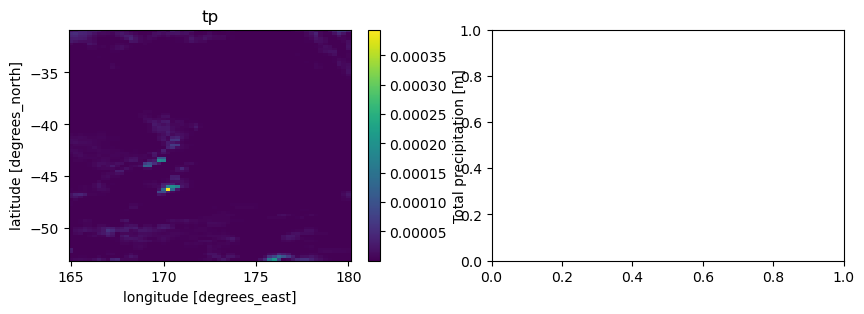

In [15]:
# Select first timestep
ds1 = ds.sel(time=ds.time[0])
ds1
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ds1["tp"].plot(ax=axes[0])
axes[0].set_title("tp")
# ds1["temp"].plot(ax=axes[1])
# axes[1].set_title("temp")
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
# ds1["kin"].plot(ax=axes[0])
# axes[0].set_title("kin")
# ds1["press_msl"].plot(ax=axes[1])
# axes[1].set_title("press_msl")


In [16]:
yml_str = f"""
meta:
  root: {root}

era5:
  crs: 4326
  data_type: RasterDataset
  driver: netcdf
  meta:
    category: meteo
    history: Extracted from ERA5 daily data on pressure levels
    source_url: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview
  path: rainfall_era5/era5_rainfall.nc
  unit_mult:
    precip: 1000

"""
data_lib = "xan_catalog/catalog/era5.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)


In [17]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
print(data_catalog.sources.keys())
ds = data_catalog.get_rasterdataset("era5")
ds

2023-06-16 17:56:01,060 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/era5.yml
dict_keys(['elevtn', 'bathymetry', 'extent', 'rivers_lin', 'era5'])
2023-06-16 17:56:01,066 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting era5 RasterDataset netcdf data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\rainfall_era5\era5_rainfall.nc


<xarray.DataArray 'tp' (time: 8760, latitude: 89, longitude: 61)>
dask.array<open_dataset-tp, shape=(8760, 89, 61), dtype=float32, chunksize=(8760, 89, 61), chunktype=numpy.ndarray>
Coordinates:
  * longitude    (longitude) float32 165.0 165.2 165.5 ... 179.5 179.8 180.0
  * latitude     (latitude) float32 -31.0 -31.25 -31.5 ... -52.5 -52.75 -53.0
  * time         (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
    spatial_ref  int32 0
Attributes:
    units:       m
    long_name:   Total precipitation
    category:    meteo
    history:     Extracted from ERA5 daily data on pressure levels
    source_url:  https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysi...

## Land cover

In [18]:
da = xr.open_dataarray(os.path.join(root, 'global_land_cover/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif'))
#pprint(da)
print(f"CRS: {da.raster.crs}")


CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [19]:
yml_str = f"""
meta:
  root: {root}

vito:
    path: global_land_cover/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif
    data_type: RasterDataset
    crs: 4326
    driver: raster
    meta:
        source_url: https://zenodo.org/record/3939050
        category: landuse

"""
data_lib = "xan_catalog/catalog/vito.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)


In [20]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
print(data_catalog.sources.keys())
da = data_catalog.get_rasterdataset("vito")

2023-06-16 17:56:01,159 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/vito.yml
dict_keys(['elevtn', 'bathymetry', 'extent', 'rivers_lin', 'era5', 'vito'])
2023-06-16 17:56:01,163 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting vito RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\global_land_cover\PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif


## merit hydro

In [21]:
yml_str = f"""
meta:
  root: {root}

merit_hydro:
  data_type: RasterDataset
  driver: raster
  crs: 4326
  meta:
    category: topography
  rename:
    s40e170_hnd: height_above_nearest_drain
    flwdir: flow_direction
    uparea: upstream_area
    upgrid: upstream_grid
    rivwth: river_width

  path: merit_hydro/*.tif
"""
# overwrite data catalog
data_lib = "xan_catalog/catalog/merit_hydro.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)

In [22]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
print(data_catalog.sources.keys())
ds = data_catalog.get_rasterdataset("merit_hydro")

2023-06-16 17:56:01,276 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/merit_hydro.yml
dict_keys(['elevtn', 'bathymetry', 'extent', 'rivers_lin', 'era5', 'vito', 'merit_hydro'])
2023-06-16 17:56:01,283 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting merit_hydro RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\merit_hydro\*.tif


nodata value missing for C:/Users/xfsmi/PycharmProjects/pythonProject/SFINCS/xan_catalog/helensville_data/merit_hydro/flwdir.tif


## Global Curve Number (GCN) infiltration dataset

In [23]:
da = xr.open_dataarray(os.path.join(root, 'GCN250_ARCII/GCN250_ARCII.tif'))
#pprint(da)
print(f"CRS: {da.raster.crs}")

CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [24]:
yml_str = f"""
meta:
  root: {root}

gcn250:
    path: GCN250_ARCII/GCN250_ARCII.tif
    data_type: RasterDataset
    driver: raster
    crs: 4326
    meta:
        source_license: CC BY 4.0
        source_url: https://doi.org/10.6084/m9.figshare.7756202.v1
        category: infiltration

"""
data_lib = "xan_catalog/catalog/gcn250.yml"
with open(data_lib, mode="w") as f:
    f.write(yml_str)


In [25]:
data_catalog.from_yml(data_lib)  # add a yaml file to the data catalog
print(data_catalog.sources.keys())
ds = data_catalog.get_rasterdataset("gcn250")


2023-06-16 17:56:01,471 - prepare data catalog - data_catalog - INFO - Parsing data catalog from xan_catalog/catalog/gcn250.yml
dict_keys(['elevtn', 'bathymetry', 'extent', 'rivers_lin', 'era5', 'vito', 'merit_hydro', 'gcn250'])
2023-06-16 17:56:01,478 - prepare data catalog - data_catalog - INFO - DataCatalog: Getting gcn250 RasterDataset raster data from C:\Users\xfsmi\PycharmProjects\pythonProject\SFINCS\xan_catalog\helensville_data\GCN250_ARCII\GCN250_ARCII.tif


In [26]:
data_catalog

,path,data_type,driver,category,source_url,history,source_license
elevtn,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,elevation,NaN,NaN,NaN
bathymetry,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,bathymetry,https://data-niwa.opendata.arcgis.com/datasets...,NaN,NaN
extent,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,water extent,NaN,NaN,NaN
rivers_lin,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,GeoDataFrame,vector,hydrography,https://zenodo.org/record/3552776#.YVbOrppByUk,NaN,NaN
era5,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,netcdf,meteo,https://cds.climate.copernicus.eu/cdsapp#!/dat...,Extracted from ERA5 daily data on pressure levels,NaN
vito,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,landuse,https://zenodo.org/record/3939050,NaN,NaN
merit_hydro,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,topography,NaN,NaN,NaN
gcn250,C:\Users\xfsmi\PycharmProjects\pythonProject\S...,RasterDataset,raster,infiltration,https://doi.org/10.6084/m9.figshare.7756202.v1,NaN,CC BY 4.0
